# Лабораторная работа №4

# Оценивание и верификация моделей линейной регрессии.

## Ноздрякова Марина

## 8 вариант

# Часть 1

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f
from scipy.optimize import fsolve
import statsmodels.api as sm
import scipy as sts

In [96]:
n = 525
gamma = 0.94
alpha = 0.06
a = 4
b = 14
sex = 1
Z = "ПОЛ"

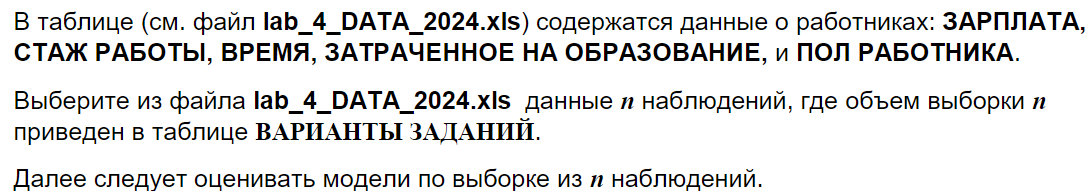

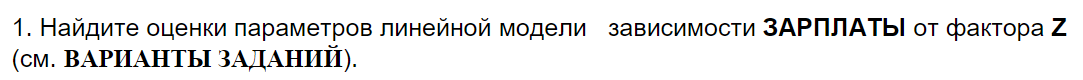

In [97]:
df = pd.read_excel("LAB_4_DATA_2024.xlsx")
df

,СТАЖ,ОБРАЗОВАНИЕ,ПОЛ,ЗП
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999
...,...,...,...,...
535,7.307693,12,1,9.500000
536,19.288462,14,1,17.299999
537,21.230770,12,1,27.520000
538,18.076923,13,1,3.880000


In [98]:
shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df

,СТАЖ,ОБРАЗОВАНИЕ,ПОЛ,ЗП
229,20.173077,12,0,15.000000
73,17.961538,19,0,47.000000
521,12.269231,16,1,15.000000
86,20.038462,12,0,20.000000
469,20.538462,12,1,24.389999
...,...,...,...,...
71,18.846153,12,0,8.770000
106,21.423077,9,0,6.480000
270,13.557693,16,1,17.620001
435,18.403847,13,1,13.790000


In [99]:
z = shuffled_df.iloc[:, 2].values[:525].reshape(-1, 1)
y = shuffled_df.iloc[:, 3].values[:525]
# print(z)
# print(y)

In [100]:
model = LinearRegression()
model.fit(z, y)

LinearRegression()

In [101]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print('slope:', b_1_hat) 
print('coefficient of determination:', model.score(z, y))

intercept: 23.18716470491878
slope: [-6.96629345]
coefficient of determination: 0.05861963996530595


In [102]:
y_predict = model.predict([[1]])
print(f"predicted response:\n{y_predict}")

predicted response:
[16.22087125]


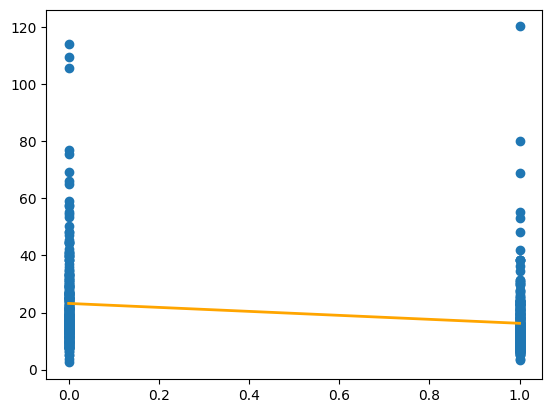

In [103]:
plt.scatter(z,y)
plt.plot(z, model.predict(z), color='orange', linewidth=2)

In [104]:
from scipy.stats import f

n = len(y)
p = z.shape[1]  

y_pred = model.predict(z)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f'RSS: {RSS}')
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')

R_2 = 1 - ESS/TSS
print(f"R^2: {R_2}")

RSS: 6369.255355155896
ESS: 102284.69337133817
TSS: 108653.94872649407
R^2: 0.05861963996530595


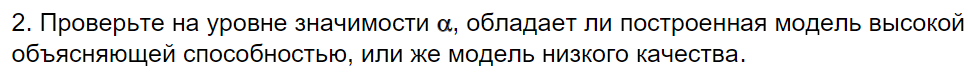

In [105]:
errors = y - y_pred
# plt.hist(errors)
# plt.show()
# sp.stats.shapiro(errors)

In [106]:
from scipy.stats import f 
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")


F - наблюдаемое значение: 32.567146079747324
F_cr - критическое значение: 3.552778897968895
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.06


In [107]:
import statsmodels.api as sm
X_new = sm.add_constant(z)
model_1 = sm.OLS(y, X_new).fit()
print(model_1.summary(alpha = 0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     32.57
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.93e-08
Time:                        14:35:11   Log-Likelihood:                -2128.9
No. Observations:                 525   AIC:                             4262.
Df Residuals:                     523   BIC:                             4270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
const         23.1872      0.866     26.786      0.0

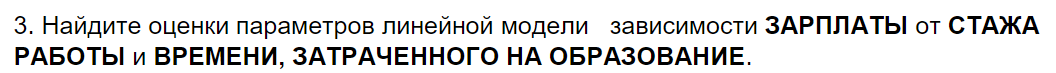

In [108]:
z_expirience = shuffled_df.iloc[:, 0].values[:525]
z_education = shuffled_df.iloc[:, 1].values[:525]
y = shuffled_df.iloc[:, 3].values[:525]
X = np.column_stack((z_expirience, z_education))
# print(X.shape)
# print(y.shape)

In [109]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [110]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print(f'b_1 (Опыт работы):', b_1_hat[0]) 
print(f'b_2 (Время потраченное на образование):', b_1_hat[1]) 
print('coefficient of determination:', model.score(X, y))

intercept: -25.509770668071415
b_1 (Опыт работы): 0.5550451315997005
b_2 (Время потраченное на образование): 2.6206361122420807
coefficient of determination: 0.19356549335852136


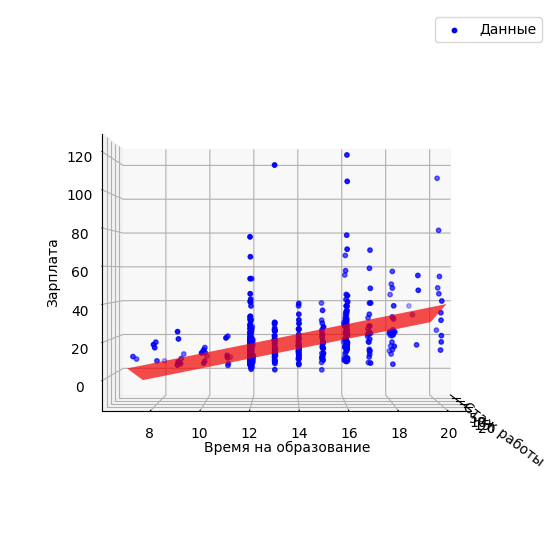

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


x1_range = np.linspace(min(z_expirience), max(z_expirience), 100)
x2_range = np.linspace(min(z_education), max(z_education), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  


X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))


y_grid = model.predict(X_grid)

y_grid = y_grid.reshape(x1_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z_expirience, z_education, y, color='b', label='Данные', s=10)

ax.plot_surface(x1_grid, x2_grid, y_grid, color='r', alpha=0.7, rstride=100, cstride=100)


ax.set_xlabel('Стаж работы')
ax.set_ylabel('Время на образование')
ax.set_zlabel('Зарплата')

ax.legend()

ax.view_init(elev=0, azim=0)  
plt.show()


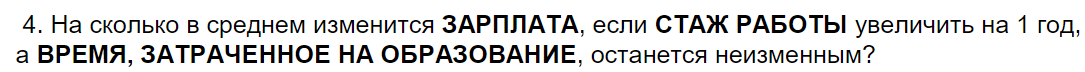

In [112]:
b_1_hat=model.coef_
print('Увеличение зарплаты если стаж увеличить на год:', b_1_hat[0]) 
print('Увеличение зарплаты если время обучения увеличить на год:', b_1_hat[1]) 

Увеличение зарплаты если стаж увеличить на год: 0.5550451315997005
Увеличение зарплаты если время обучения увеличить на год: 2.6206361122420807


In [113]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 21031.65519059531
ESS: 87622.29353589876
TSS: 108653.94872649407
R2: 0.19356549335852136


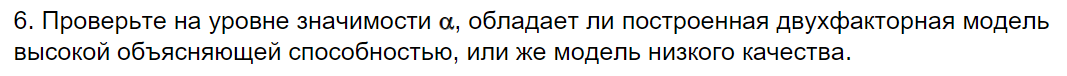

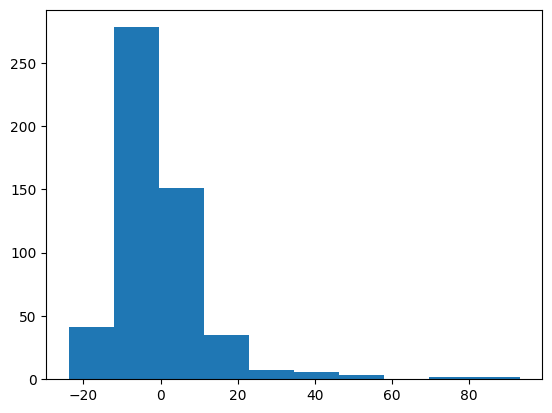

ShapiroResult(statistic=0.7594409584999084, pvalue=5.647165175427599e-27)

In [114]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [115]:
from scipy.stats import f
 
m = 2
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 62.646865121105634
F_cr - критическое значение: 2.8286287190528006
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.06


In [116]:
X_new = sm.add_constant(X)
model_2 = sm.OLS(y, X_new).fit()
print(model_2.summary(alpha = 0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     62.65
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           4.12e-25
Time:                        14:35:11   Log-Likelihood:                -2088.3
No. Observations:                 525   AIC:                             4183.
Df Residuals:                     522   BIC:                             4195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
const        -25.5098      4.332     -5.889      0.0

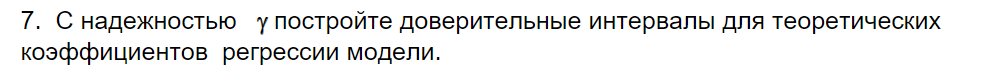

In [117]:
errors = y - y_pred
n = len(y) 
Se2 = np.sum(errors**2)/(n-2-1)
Se = np.sqrt(Se2)
print(Se)

12.956033338842591


In [118]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education))
X_matr

array([[ 1.        , 20.17307663, 12.        ],
       [ 1.        , 17.96153831, 19.        ],
       [ 1.        , 12.26923084, 16.        ],
       ...,
       [ 1.        , 17.48077011, 12.        ],
       [ 1.        ,  8.86538506, 12.        ],
       [ 1.        , 20.40384674, 14.        ]])

In [119]:
from scipy import linalg

X_matr_T=X_matr.transpose()
Z=X_matr_T.dot(X_matr)
Z_inv =linalg.inv(Z)

In [120]:
se_b_0_hat=Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")    

Стандартная ошибка коэффициента b_0_hat: 4.331904593369461
Стандартная ошибка коэффициента b_1_hat: 0.12995263668119847
Стандартная ошибка коэффициента b_2_hat: 0.2377341624350446


In [121]:
from scipy import stats
n = len(y)
m = 2
b_0_hat=model.intercept_
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

t_cr = stats.t.ppf((1+gamma)/2, n-m-1)
print(f"Доверительный интервал для b_0_hat на уровне надежности: {gamma}: {b_0_hat - (t_cr*se_b_0_hat), b_0_hat + (t_cr*se_b_0_hat)}")
print(f"Доверительный интервал для b_1_hat на уровне надежности: {gamma}: {b_1_hat - (t_cr*se_b_1_hat), b_1_hat + (t_cr*se_b_1_hat)}")
print(f"Доверительный интервал для b_2_hat на уровне надежности: {gamma}: {b_2_hat - (t_cr*se_b_2_hat), b_2_hat + (t_cr*se_b_2_hat)}")

Доверительный интервал для b_0_hat на уровне надежности: 0.94: (-33.6749322170205, -17.34460911912233)
Доверительный интервал для b_1_hat на уровне надежности: 0.94: (0.3100987692449066, 0.7999914939544943)
Доверительный интервал для b_2_hat на уровне надежности: 0.94: (2.172533482060104, 3.0687387424240575)


In [122]:
from scipy import stats
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

n = len(y)
m = 2

t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}')
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}')

t_cr = stats.t.ppf(1-alpha/2, n - m - 1)
print(t_cr)

if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b1_hat значим на уровне значимости alpha: {alpha}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b2_hat значим на уровне значимости alpha: {alpha}")

СВ t_1:  4.271134051410935
СВ t_2:  11.023388836503921
1.8848895152139125
Коэффициент b1_hat значим на уровне значимости alpha: 0.06
Коэффициент b2_hat значим на уровне значимости alpha: 0.06


# Часть 2

In [123]:
X = np.column_stack((z_expirience, z_education, z)) 
print(X)

[[20.17307663 12.          0.        ]
 [17.96153831 19.          0.        ]
 [12.26923084 16.          1.        ]
 ...
 [17.48077011 12.          1.        ]
 [ 8.86538506 12.          1.        ]
 [20.40384674 14.          1.        ]]


In [124]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

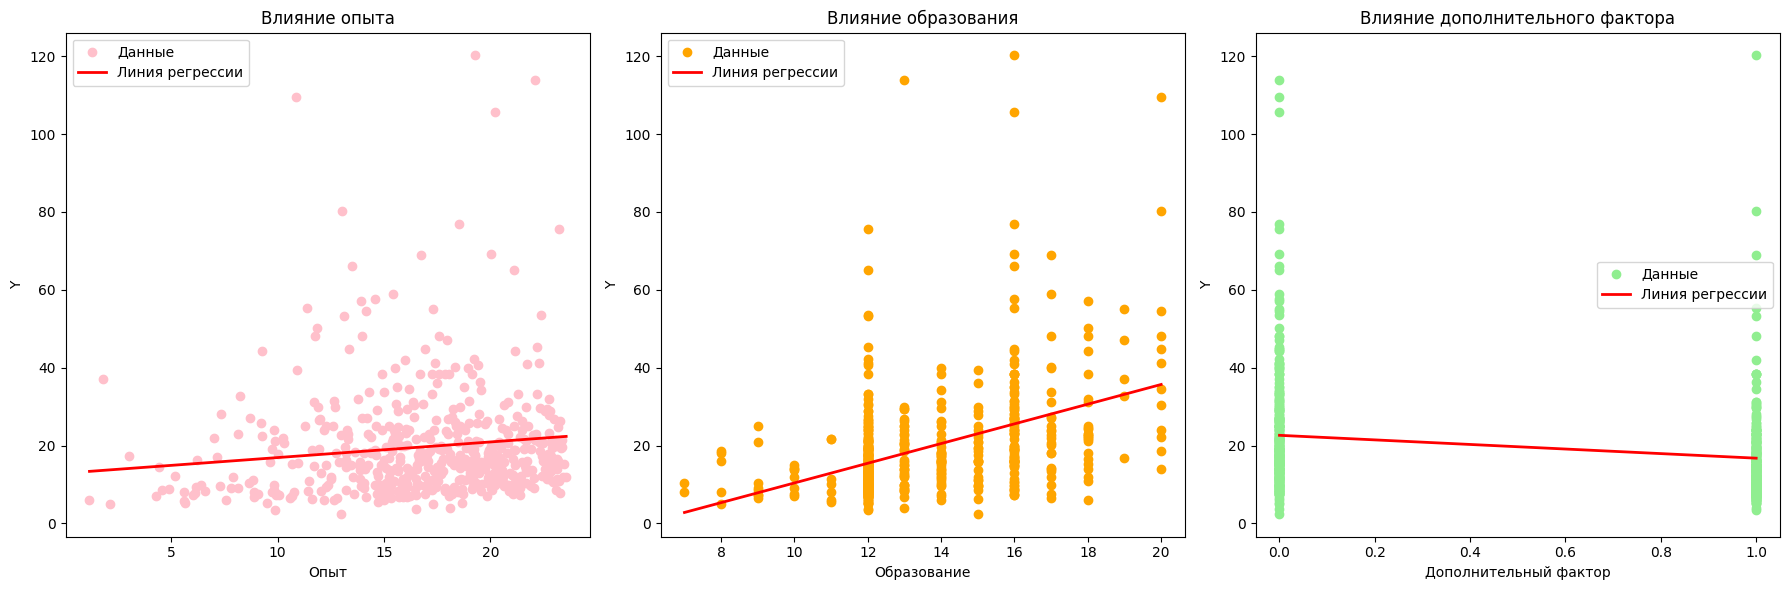

In [125]:
z_expirience_range = np.linspace(z_expirience.min(), z_expirience.max(), 100).reshape(-1, 1)
z_education_fixed = np.mean(z_education) * np.ones_like(z_expirience_range)
z_fixed = np.mean(z) * np.ones_like(z_expirience_range)
X_expirience = np.column_stack((z_expirience_range, z_education_fixed, z_fixed))
y_expirience_pred = model.predict(X_expirience)

z_education_range = np.linspace(z_education.min(), z_education.max(), 100).reshape(-1, 1)
z_expirience_fixed = np.mean(z_expirience) * np.ones_like(z_education_range)
z_fixed = np.mean(z) * np.ones_like(z_education_range)
X_education = np.column_stack((z_expirience_fixed, z_education_range, z_fixed))
y_education_pred = model.predict(X_education)

z_range = np.linspace(z.min(), z.max(), 100).reshape(-1, 1)
z_expirience_fixed = np.mean(z_expirience) * np.ones_like(z_range)
z_education_fixed = np.mean(z_education) * np.ones_like(z_range)
X_z = np.column_stack((z_expirience_fixed, z_education_fixed, z_range))
y_z_pred = model.predict(X_z)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График 1: Опыт (z_expirience)
axes[0].scatter(z_expirience, y, color='pink', label='Данные')
axes[0].plot(z_expirience_range, y_expirience_pred, color='red', linewidth=2, label='Линия регрессии')
axes[0].set_title('Влияние опыта')
axes[0].set_xlabel('Опыт')
axes[0].set_ylabel('Y')
axes[0].legend()

# График 2: Образование (z_education)
axes[1].scatter(z_education, y, color='orange', label='Данные')
axes[1].plot(z_education_range, y_education_pred, color='red', linewidth=2, label='Линия регрессии')
axes[1].set_title('Влияние образования')
axes[1].set_xlabel('Образование')
axes[1].set_ylabel('Y')
axes[1].legend()

# График 3: Дополнительный фактор (z)
axes[2].scatter(z, y, color='lightgreen', label='Данные')
axes[2].plot(z_range, y_z_pred, color='red', linewidth=2, label='Линия регрессии')
axes[2].set_title('Влияние дополнительного фактора')
axes[2].set_xlabel('Дополнительный фактор')
axes[2].set_ylabel('Y')
axes[2].legend()

# Убираем лишние отступы и показываем графики
plt.tight_layout()
plt.show()

In [126]:
import statsmodels.api as sm

X_new = sm.add_constant(X)
model_3 = sm.OLS(y, X_new).fit()
print(model_3.summary(alpha = 0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     52.76
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           8.64e-30
Time:                        14:35:12   Log-Likelihood:                -2075.1
No. Observations:                 525   AIC:                             4158.
Df Residuals:                     521   BIC:                             4175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
const        -18.6998      4.429     -4.222      0.0

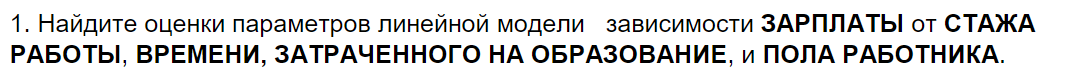

In [127]:
b_0_hat = model.intercept_
print('intercept:', b_0_hat) 
b_1_hat, b_2_hat,b_3_hat = model.coef_
print(f'b_1 (Опыт работы):', b_1_hat) 
print(f'b_2 (Время потраченное на образование):', b_2_hat) 
print(f'b_3 (Пол рабочего):', b_3_hat) 
print(f'R^2: {model.score(X, y)}')

intercept: -18.69975240871808
b_1 (Опыт работы): 0.4009181804355877
b_2 (Время потраченное на образование): 2.528832426800968
b_3 (Пол рабочего): -5.871083491026715
R^2: 0.2330013050708546


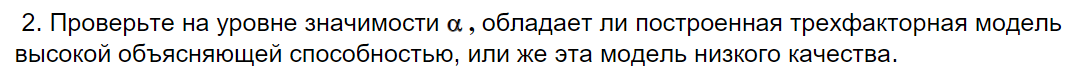

In [128]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 25316.51185437484
ESS: 83337.43687211923
TSS: 108653.94872649407
R2: 0.2330013050708546


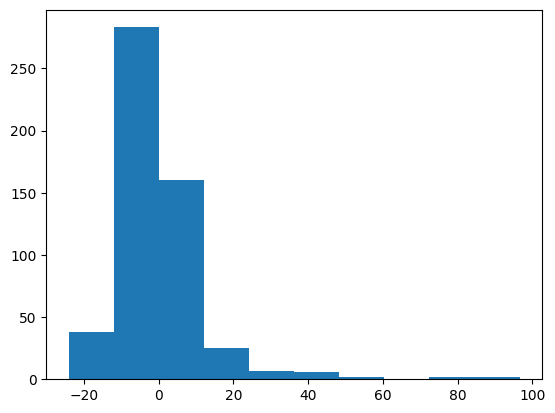

ShapiroResult(statistic=0.7540600299835205, pvalue=3.1744061345234895e-27)

In [129]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [130]:
from scipy.stats import f 
m = 3
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")

if F > F_cr:
    print(f"Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 52.75701281913719
F_cr - критическое значение: 2.484197368839538
Коээфициент R2 значим на уровне alpha = 0.06


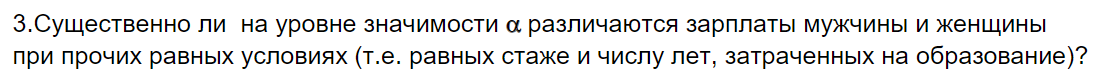

In [131]:
errors = y - y_pred
n = len(y) 
Se2 = np.sum(errors**2)/(n-3-1)
Se = np.sqrt(Se2)
print(Se)

12.647398651612908


In [132]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education, z))
X_matr_trans = X_matr.transpose()
Z = X_matr_trans.dot(X_matr)
Z_inv = linalg.inv(Z)

In [133]:
se_b_0_hat=Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")    
se_b_3_hat=Se*math.sqrt(Z_inv[3][3])
print(f"Стандартная ошибка коэффициента b_3_hat: {se_b_3_hat}")    

Стандартная ошибка коэффициента b_0_hat: 4.428686100595798
Стандартная ошибка коэффициента b_1_hat: 0.13030533173390454
Стандартная ошибка коэффициента b_2_hat: 0.23274779754392377
Стандартная ошибка коэффициента b_3_hat: 1.1343610737937306


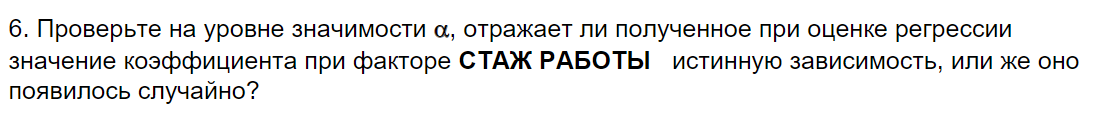

In [134]:
t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}') 
t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
print(t_cr)
if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat (опыт работы) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b1_hat (опыт работы) значим на уровне надежности gamma: {gamma}")

# if -t_cr < t_3 < t_cr:
#     print(f"Коэффициент b3_hat (пол рабочего) не значим на уровне надежности gamma: {gamma}")
# else:
#     print(f"Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: {gamma}")

СВ t_1:  3.0767596007068954
1.8848973937863547
Коэффициент b1_hat (опыт работы) значим на уровне надежности gamma: 0.94


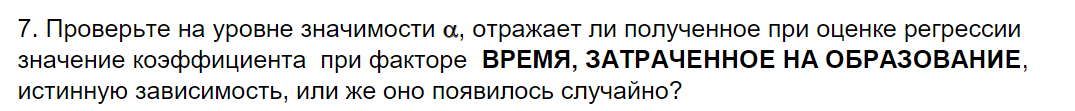

In [135]:
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}') 
t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
print(t_cr) 

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat (время потраченное на образование) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b2_hat (время потраченное на образование) значим на уровне надежности gamma: {gamma}")


СВ t_2:  10.865118611159922
1.8848973937863547
Коэффициент b2_hat (время потраченное на образование) значим на уровне надежности gamma: 0.94


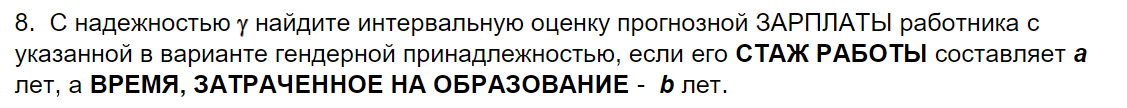

In [136]:
b, c, a = 4, 12, 0
new_X = np.array([1, b, c, a])  
prediction = model_3.get_prediction(new_X)
pred_summary = prediction.summary_frame(alpha=(1-gamma))  
pred_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.249909,2.089976,9.310519,17.1893,-10.912438,37.412257


In [137]:
m = 3
b, c, a = 4, 14, 1
new_X = np.array([1, b, c, a])  
new_X_T = np.array([1, b, c, a]).transpose()
new_Z = new_X.dot(Z_inv)
res_matr = new_Z.dot(new_X)

t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
y_hat = b_0_hat+b_1_hat*new_X[1]+b_2_hat*new_X[2]+b_3_hat*new_X[3]
print(y_hat)
co = Se*np.sqrt(1+res_matr)
print(f'Интервальная оценка для индивидуального (прогнозного) значения y_hat: {y_hat-co*t_cr} - {y_hat+co*t_cr}')

12.436490797211109
Интервальная оценка для индивидуального (прогнозного) значения y_hat: -11.62241443750551 - 36.495396031927726


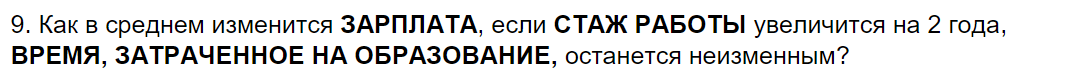

In [138]:
b_1_hat, b_2_hat,b_3_hat = model.coef_
print(b_1_hat*2)

0.8018363608711754


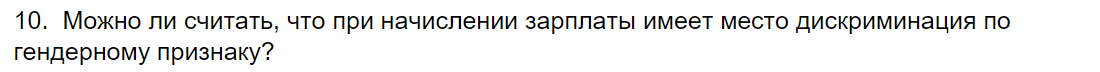

In [139]:
t_3 = b_3_hat/ se_b_3_hat
print(f'СВ t_3:  {t_3}')
t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
print(t_cr)

if -t_cr < t_3 < t_cr:
    print(f"Коэффициент b3_hat (пол рабочего) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: {gamma}")

СВ t_3:  -5.175674330389001
1.8848973937863547
Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: 0.94
